In [1]:
import torch
import torch.nn as nn
import pandas
import random
import matplotlib.pyplot as plt
import numpy

In [2]:
def generate_real():
  real_data = torch.FloatTensor(
      [random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2),
       random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2)])
  return real_data

In [3]:
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [4]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(4, 3),
        nn.Sigmoid(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )

    self.loss_function = nn.MSELoss()

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    self.counter = 0
    self.progress = []

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):

    outputs = self.forward(inputs)

    loss = self.loss_function(outputs, targets)

    self.counter += 1
    if self.counter % 10 == 0:
      self.progress.append(loss.item())
      pass
    if self.counter % 10000 == 0:
      print("counter = ", self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

In [5]:
class Generator(nn.Module):

  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(1, 3),
        nn.Sigmoid(),
        nn.Linear(3, 4),
        nn.Sigmoid()
    )

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, D, inputs, targets):

    g_output = self.forward(inputs)
    d_output = D.forward(g_output)
    loss = D.loss_function(d_output, targets)

    self.counter += 1
    if (self.counter % 10 == 0):
        self.progress.append(loss.item())
        pass

    # zero gradients, perform a backward pass, update weights
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

In [6]:
D = Discriminator()
G = Generator()
image_list=[]
for i in range(10000):
  D.train(generate_real(), torch.FloatTensor([1.0]))
  D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
  G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
  if i%1000 == 0:
    image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy())
  pass

counter =  10000
counter =  20000


Text(0.5, 0, 'Discriminator loss chart')

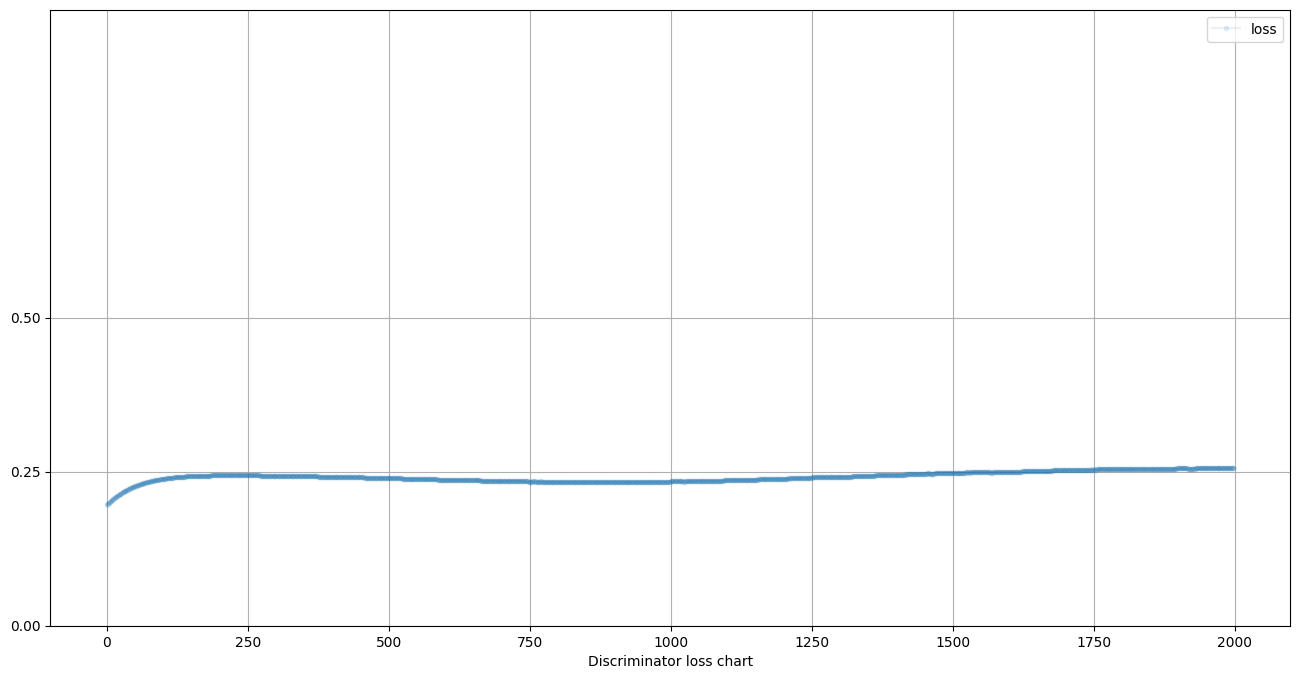

In [7]:
D.plot_progress()
plt.xlabel("Discriminator loss chart")

Text(0.5, 0, 'Generator loss chart')

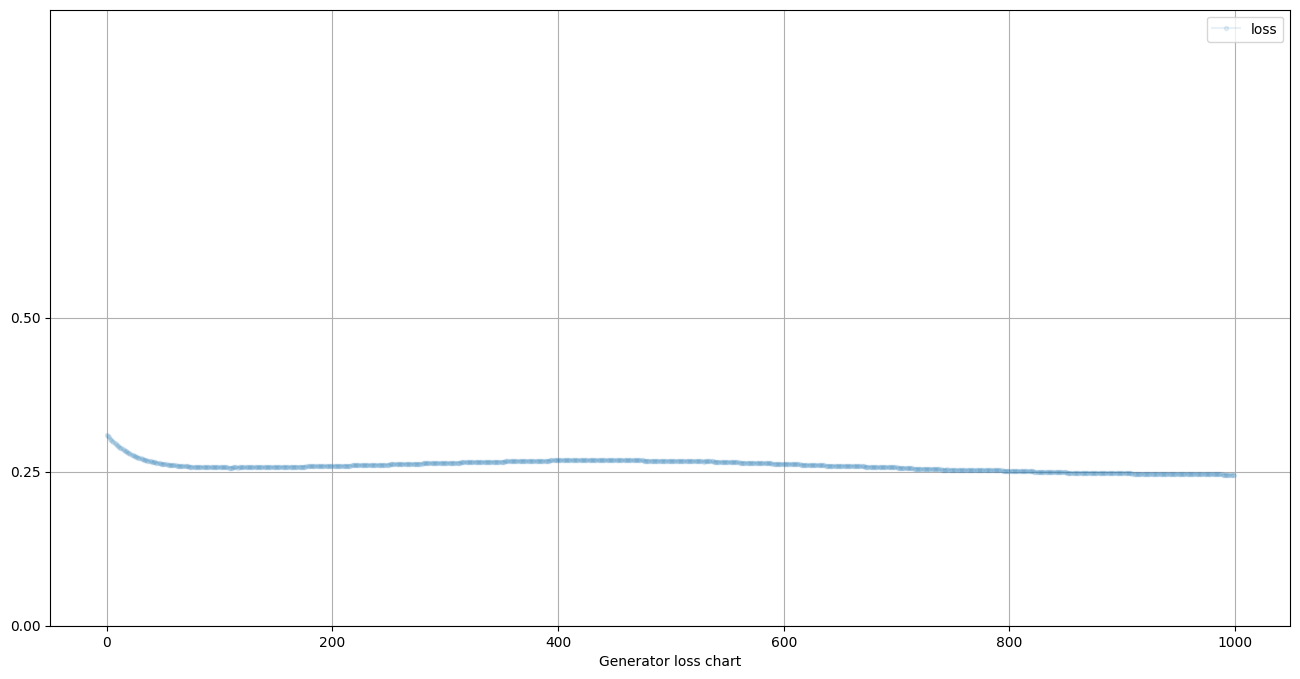

In [8]:
G.plot_progress()
plt.xlabel("Generator loss chart")

In [9]:
print("Output of trained generator:", G.forward(torch.FloatTensor([0.5])))

Output of trained generator: tensor([0.9291, 0.0798, 0.9152, 0.0610], grad_fn=<SigmoidBackward0>)


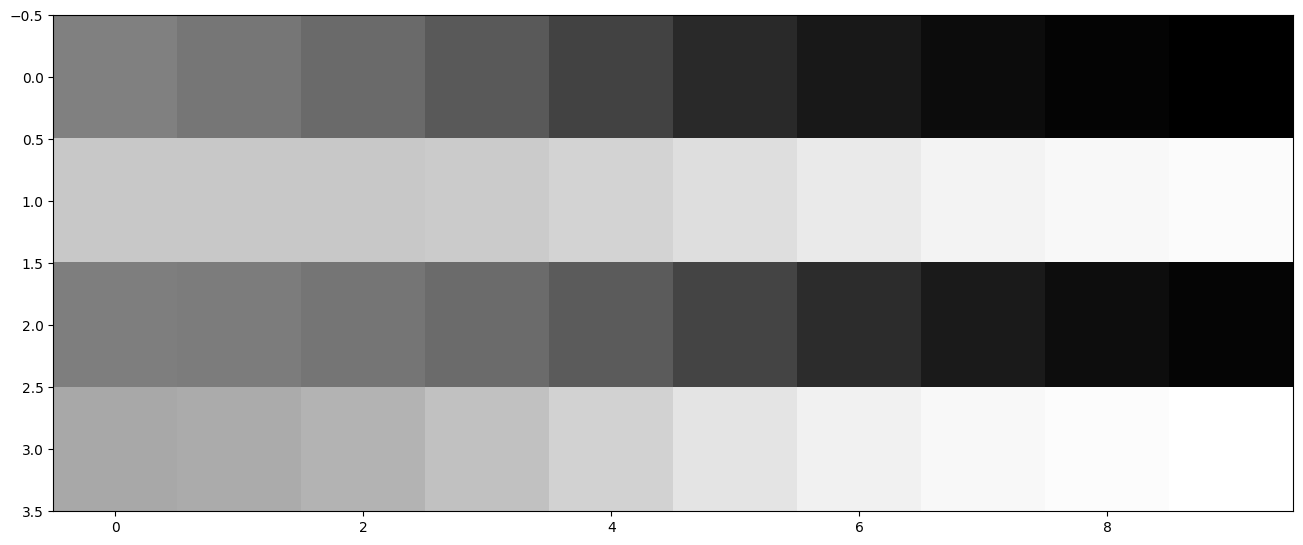

In [12]:
plt.figure(figsize = (16,8))
plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Greys')